In [1]:
#attempt 1

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(["EIN","NAME"], axis = 1, inplace=True)

In [4]:
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

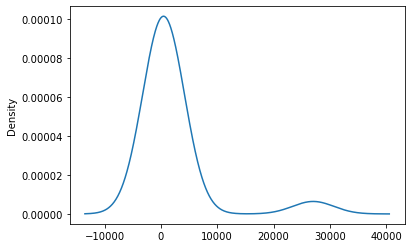

In [6]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_df.APPLICATION_TYPE.value_counts().plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = [i for i in application_df.APPLICATION_TYPE.value_counts()[application_df.APPLICATION_TYPE.value_counts() < 500].index]
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C2600        1
C4200        1
C5200        1
C2561        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

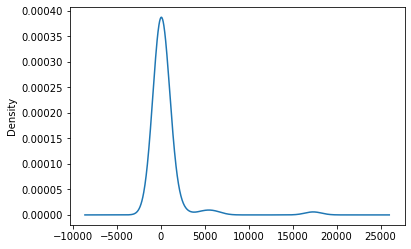

In [9]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
application_df.CLASSIFICATION.value_counts().plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = [
    i for i in application_df.CLASSIFICATION.value_counts()[application_df.CLASSIFICATION.value_counts() < 1800].index
]
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
application_df.ASK_AMT = application_df.ASK_AMT.apply(lambda x: "0 to 5000" if x <= 5000 else ("5001 to 10000" if x > 5000 and x <= 10000 else "greater than 10000"))

In [12]:
application_cat = [i for i in application_df.dtypes[application_df.dtypes == "object"].index]
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
# fit and transform the data 
encode_df = pd.DataFrame(
    enc.fit_transform(application_df[application_cat])
)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_0 to 5000,ASK_AMT_5001 to 10000,ASK_AMT_greater than 10000
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [14]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(
    encode_df, 
    left_index=True,
    right_index=True
).drop(
    application_cat,
    1
)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_0 to 5000,ASK_AMT_5001 to 10000,ASK_AMT_greater than 10000
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop("IS_SUCCESSFUL",axis =1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 78
)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

#define the checkpoint path and filenames
os.makedirs(
    "../checkpoints/",exist_ok = True
)

checkpoint_path = "../checkpoints/weights.{epoch:02d}.hdf5"

# create a callback that saces the model's weight every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only = True,
    sav_freq = 100
)



In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
hidden_layer1 = 80
hidden_layer2 = 30
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = hidden_layer1,
        activation = "relu",
        input_dim = number_input_features
    )
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = hidden_layer2,
        activation = "relu"
    )
)

# Output layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 1,
        activation = "sigmoid"
    )
)


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3680      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 6,141
Trainable params: 6,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [20]:
# Train the model
#  YOUR CODE GOES HERE
#train the model 
# train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs = 100,
    callbacks = cp_callback
)

Epoch 1/100
804/804 [==============================] - 1s 746us/step - loss: 0.5888 - accuracy: 0.7078

Epoch 00001: saving model to ../checkpoints/weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 1s 742us/step - loss: 0.5511 - accuracy: 0.7343

Epoch 00002: saving model to ../checkpoints/weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 1s 725us/step - loss: 0.5500 - accuracy: 0.7353

Epoch 00003: saving model to ../checkpoints/weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 1s 734us/step - loss: 0.5536 - accuracy: 0.7295

Epoch 00004: saving model to ../checkpoints/weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 1s 731us/step - loss: 0.5490 - accuracy: 0.7298

Epoch 00005: saving model to ../checkpoints/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 730us/step - loss: 0.5419 - accuracy: 0.7368

Epoch 00006: saving model to ../checkpoints/weights.06.hdf5
Epoch 7/100
804/

804/804 [==============================] - 1s 751us/step - loss: 0.5336 - accuracy: 0.7407

Epoch 00051: saving model to ../checkpoints/weights.51.hdf5
Epoch 52/100
804/804 [==============================] - 1s 748us/step - loss: 0.5379 - accuracy: 0.7374

Epoch 00052: saving model to ../checkpoints/weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 1s 750us/step - loss: 0.5366 - accuracy: 0.7391

Epoch 00053: saving model to ../checkpoints/weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 1s 745us/step - loss: 0.5332 - accuracy: 0.7402

Epoch 00054: saving model to ../checkpoints/weights.54.hdf5
Epoch 55/100
804/804 [==============================] - 1s 752us/step - loss: 0.5340 - accuracy: 0.7416

Epoch 00055: saving model to ../checkpoints/weights.55.hdf5
Epoch 56/100
804/804 [==============================] - 1s 771us/step - loss: 0.5297 - accuracy: 0.7451

Epoch 00056: saving model to ../checkpoints/weights.56.hdf5
Epoch 57/100
804/804 [=

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5607 - accuracy: 0.7257
Loss: 0.5606580972671509, Accuracy: 0.7257142663002014


In [22]:
#attempt 2

In [23]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(["EIN","NAME","SPECIAL_CONSIDERATIONS","ASK_AMT","STATUS"], axis = 1, inplace=True)

In [25]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = [i for i in application_df.APPLICATION_TYPE.value_counts()[application_df.APPLICATION_TYPE.value_counts() < 500].index]
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [26]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = [
    i for i in application_df.CLASSIFICATION.value_counts()[application_df.CLASSIFICATION.value_counts() < 1800].index
]
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [27]:
application_cat = [i for i in application_df.dtypes[application_df.dtypes == "object"].index]
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
# fit and transform the data 
encode_df = pd.DataFrame(
    enc.fit_transform(application_df[application_cat])
)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(
    encode_df, 
    left_index=True,
    right_index=True
).drop(
    application_cat,
    1
)
application_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop("IS_SUCCESSFUL",axis =1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 78,
    stratify = y
)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
hidden_layer1 = 160
hidden_layer2 = 80
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = hidden_layer1,
        activation = "relu",
        input_dim = number_input_features
    )
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = hidden_layer2,
        activation = "relu"
    )
)

# third hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 30,
        activation = "relu"
    )
)

# fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 10,
        activation = "relu"
    )
)


# Output layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 1,
        activation = "sigmoid"
    )
)


# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 160)               6400      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 22,031
Trainable params: 22,031
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(
    loss = "binary_crossentropy",
    optimizer = "Adam",
    metrics = ["accuracy"]
)

In [34]:
# Train the model
#  YOUR CODE GOES HERE
#train the model 
# train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs = 100,
    callbacks = cp_callback
)

Epoch 1/100
804/804 [==============================] - 1s 947us/step - loss: 0.5857 - accuracy: 0.7124

Epoch 00001: saving model to ../checkpoints/weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 1s 937us/step - loss: 0.5581 - accuracy: 0.7273

Epoch 00002: saving model to ../checkpoints/weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 1s 939us/step - loss: 0.5567 - accuracy: 0.7258

Epoch 00003: saving model to ../checkpoints/weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 1s 933us/step - loss: 0.5490 - accuracy: 0.7332

Epoch 00004: saving model to ../checkpoints/weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 1s 936us/step - loss: 0.5510 - accuracy: 0.7265

Epoch 00005: saving model to ../checkpoints/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 1s 959us/step - loss: 0.5500 - accuracy: 0.7322

Epoch 00006: saving model to ../checkpoints/weights.06.hdf5
Epoch 7/100
804/

804/804 [==============================] - 1s 894us/step - loss: 0.5352 - accuracy: 0.7383

Epoch 00051: saving model to ../checkpoints/weights.51.hdf5
Epoch 52/100
804/804 [==============================] - 1s 895us/step - loss: 0.5346 - accuracy: 0.7397

Epoch 00052: saving model to ../checkpoints/weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 1s 891us/step - loss: 0.5296 - accuracy: 0.7453

Epoch 00053: saving model to ../checkpoints/weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 1s 911us/step - loss: 0.5345 - accuracy: 0.7391

Epoch 00054: saving model to ../checkpoints/weights.54.hdf5
Epoch 55/100
804/804 [==============================] - 1s 912us/step - loss: 0.5349 - accuracy: 0.7392

Epoch 00055: saving model to ../checkpoints/weights.55.hdf5
Epoch 56/100
804/804 [==============================] - 1s 934us/step - loss: 0.5290 - accuracy: 0.7438

Epoch 00056: saving model to ../checkpoints/weights.56.hdf5
Epoch 57/100
804/804 [=

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5745 - accuracy: 0.7310
Loss: 0.5744525194168091, Accuracy: 0.7309620976448059


In [36]:
#attempt 3

In [37]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [38]:
application_df.drop(["EIN","NAME","STATUS"], axis = 1, inplace=True)

In [39]:
max(sorted(set(application_df.ASK_AMT.tolist())))

def myfunct(x):
    if x in range(0,10000):
        return "0-9999"
    if x in range (10000,100000):
        return "10000-99999"
    if x in range(100000, 1000000):
        return "100000-999999"
    if x in range(1000000, 10000000):
        return "1000000-9999999"
    if x in range(10000000, 100000000):
        return "10000000-99999999"
    if x in range(100000000, 1000000000):
        return "100000000-999999999"
    if x in range(1000000000, 10000000000):
        return "1000000000-9999999999"

application_df.ASK_AMT = application_df.ASK_AMT.apply(lambda x: myfunct(x))


<AxesSubplot:ylabel='Density'>

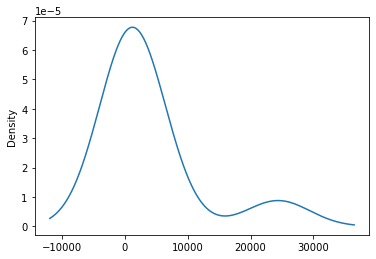

In [40]:
application_df.INCOME_AMT.value_counts().plot.density()

In [41]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = [i for i in application_df.APPLICATION_TYPE.value_counts()[application_df.APPLICATION_TYPE.value_counts() < 500].index]
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [42]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = [
    i for i in application_df.CLASSIFICATION.value_counts()[application_df.CLASSIFICATION.value_counts() < 1800].index
]
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [43]:
application_cat = [i for i in application_df.dtypes[application_df.dtypes == "object"].index]
application_cat
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
ASK_AMT                   7
dtype: int64

In [44]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
# fit and transform the data 
encode_df = pd.DataFrame(
    enc.fit_transform(application_df[application_cat])
)





# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_0-9999,ASK_AMT_10000-99999,ASK_AMT_100000-999999,ASK_AMT_1000000-9999999,ASK_AMT_10000000-99999999,ASK_AMT_100000000-999999999,ASK_AMT_1000000000-9999999999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(
    encode_df, 
    left_index=True,
    right_index=True
).drop(
    application_cat,
    1
)
application_df.columns

Index(['IS_SUCCESSFUL', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT

In [46]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL.values
y = y.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL",axis =1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 78,
    stratify = y
)

In [47]:
import sklearn
# Create a StandardScaler instances
scaler = sklearn.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [48]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
hidden_layer1 = 8
hidden_layer2 = 3
number_input_features = len(X_train[0])

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = hidden_layer1,
        activation = "relu",
        input_dim = number_input_features
    )
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = hidden_layer1,
        activation = "relu"
    )
)

# third hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 5,
        activation = "relu"
    )
)

# fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 4,
        activation = "relu"
    )
)

# fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 2,
        activation = "relu"
    )
)



# Output layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(
        units = 1,
        activation = "sigmoid"
    )
)


# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 392       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 45        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 3         
Total params: 546
Trainable params: 546
Non-trainable params: 0
________________________________________________________

In [49]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [50]:
#  YOUR CODE GOES HERE
#train the model 
# train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs = 50,
    shuffle = True,
    callbacks = cp_callback
)

Epoch 1/50
804/804 [==============================] - 1s 683us/step - loss: 0.6561 - accuracy: 0.6324

Epoch 00001: saving model to ../checkpoints/weights.01.hdf5
Epoch 2/50
804/804 [==============================] - 1s 715us/step - loss: 0.5891 - accuracy: 0.7249

Epoch 00002: saving model to ../checkpoints/weights.02.hdf5
Epoch 3/50
804/804 [==============================] - 1s 680us/step - loss: 0.5716 - accuracy: 0.7317

Epoch 00003: saving model to ../checkpoints/weights.03.hdf5
Epoch 4/50
804/804 [==============================] - 1s 695us/step - loss: 0.5692 - accuracy: 0.7294

Epoch 00004: saving model to ../checkpoints/weights.04.hdf5
Epoch 5/50
804/804 [==============================] - 1s 682us/step - loss: 0.5605 - accuracy: 0.7355

Epoch 00005: saving model to ../checkpoints/weights.05.hdf5
Epoch 6/50
804/804 [==============================] - 1s 696us/step - loss: 0.5688 - accuracy: 0.7305

Epoch 00006: saving model to ../checkpoints/weights.06.hdf5
Epoch 7/50
804/804 [==

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5555 - accuracy: 0.7300
Loss: 0.5554693937301636, Accuracy: 0.7300291657447815


In [52]:
nn.save("../AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:>

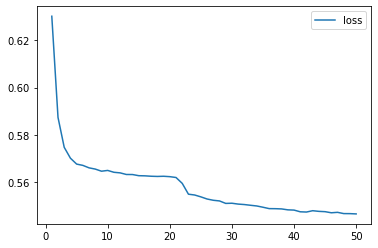

In [53]:
#testing
result_df = pd.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["loss"]) + 1)
)

result_df.plot(y="loss")

<AxesSubplot:>

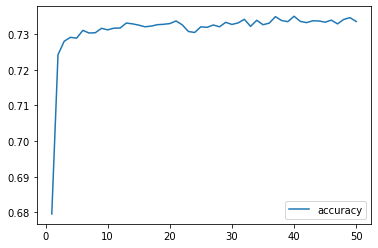

In [54]:
#testing
result_df = pd.DataFrame(
    fit_model.history,
    index = range(1, len(fit_model.history["accuracy"]) + 1)
)

result_df.plot(y="accuracy")